run with `popstrucure` env

In [2]:
import os
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import glob
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
proj_dir="/master/nplatt/sch_hae_its-nigeria"
results_dir="{}/results".format(proj_dir)

os.chdir(proj_dir)

In [4]:
#you can get this table from the SCAN dryad link
info_df=pd.read_csv(f"{proj_dir}/its-nigeria_samplesheet.csv", sep=",")
info_df

,wgs_id,its_id,sra,species,country,locale,patient,miracidum
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,NaN,sbovis,nigeria,ak,1,1
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,NaN,sbovis,nigeria,ak,2,1
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,NaN,sbovis,nigeria,ak,2,2
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,NaN,sbovis,nigeria,ak,2,3
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,NaN,sbovis,nigeria,ak,3,1
...,...,...,...,...,...,...,...,...
200,Sh_NG_os_3_1,sh_ng_os_3_1,NaN,shaematobium,nigeria,osun,3,1
201,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,osun,3,11
202,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,osun,3,5
203,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,NaN,shaematobium,nigeria,osun,3,6


In [8]:
Path(f"{results_dir}/supervised_admixture/logs").mkdir(parents=True, exist_ok=True)
os.chdir(f"{results_dir}/supervised_admixture")

In [11]:
%%bash

conda run -n plink \
    plink \
        --vcf ../unsupervised_admixture/adm.vcf \
        --out adm \
        --double-id \
        --recode12 \
        --allow-extra-chr

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
urcell, Christopher Chang   GNU General Public License v3
recode 12 ...".2 flag deprecated.  Use "--
Logging to adm.log.
Options in effect:
  --allow-extra-chr
  --double-id
  --out adm
  --recode 12
  --vcf ../unsupervised_admixture/adm.vcf

MB for main workspace.d; reserving 515643 

--vcf: 1k variants complete.
--vcf: 2k variants complete.
 complete.variants
--vcf: 4k variants complete.
--vcf: 5k variants complete.
--vcf: 6k variants complete.
vcf: 7k variants complete.
--vcf: 8k variants complete.
--vcf: 9k variants complete.
ants complete.i
--vcf: 11k variants complete.
--vcf: 12k variants complete.
ete.f: 13k variants compl
--vcf: 14k variants complete.
--vcf: 15k variants complete.
--vcf: 16k variants complete.
: 17k variants complete.
--vcf: adm-temporary.bed + adm-temporary.bim + adm-temporary.fam written.
7369 variants loaded from .bim file.
.00 people (0 males, 0 females, 200 ambiguous) loaded fro

In [8]:
%%bash

# edit this to only include ingroup samples
conda run -n bcftools bcftools query -l ../unsupervised_admixture/adm.vcf >samples.list

## Supervised Admixture

In [24]:
#get sh references 
sh_refs = info_df.loc[ ((info_df["species"] == "shaematobium") & (info_df["country"] != "nigeria"))]
sh_refs

,wgs_id,its_id,prev_wgs_id,sra,species,country,locale,patient,miracidum
86,SRR11907426,se_sha_madag_belesalampy_77,sha_madag_belesalampy_77,SRR11907426,shaematobium,madagascar,belesalampy,NaN,NaN
87,SRR11907524,se_sha_namib_mayenzere_134,sha_namib_mayenzere_134,SRR11907524,shaematobium,namibia,mayenzere,NaN,NaN
88,SRR11907410,se_sha_pemba_uwandani_13,sha_pemba_uwandani_13,SRR11907410,shaematobium,zanzibar,uwandani,NaN,NaN
93,SRR11907435,se_sha_angola_icau_64,sha_angola_icau_64,SRR11907435,shaematobium,angola,icau,NaN,NaN
94,SRR11907484,se_sha_swaz_mkhuzweni_177,sha_swaz_mkhuzweni_177,SRR11907484,shaematobium,swaziland,mkhuzweni,NaN,NaN
95,SRR11907431,se_ssp_zambia_kafue_71,ssp_zambia_kafue_71,SRR11907431,shaematobium,zambia,kafue,NaN,NaN


In [23]:
#get sc references 
sc_refs = info_df.loc[ ((info_df["species"] == "scurassoni") & (info_df["country"] != "nigeria"))]
sc_refs

,wgs_id,its_id,prev_wgs_id,sra,species,country,locale,patient,miracidum
117,ERR5908628,NaN,sc_SAMEA104448987,ERR5908628,scurassoni,NaN,NaN,NaN,NaN
118,ERR3012902,NaN,sc_SAMEA104448991,ERR3012902,scurassoni,NaN,NaN,NaN,NaN
119,ERR5919555,NaN,sc_SAMEA5053754,ERR5919555,scurassoni,NaN,NaN,NaN,NaN
120,ERR5919556,NaN,sc_SAMEA5053755,ERR5919556,scurassoni,NaN,NaN,NaN,NaN
121,ERR5919559,NaN,sc_SAMEA5053758,ERR5919559,scurassoni,NaN,NaN,NaN,NaN
122,ERR5919562,NaN,sc_SAMEA5053761,ERR5919562,scurassoni,NaN,NaN,NaN,NaN
123,ERR5919564,NaN,sc_SAMEA5053763,ERR5919564,scurassoni,NaN,NaN,NaN,NaN


In [25]:
#get sb references 
sb_refs = info_df.loc[ ((info_df["species"] == "sbovis") & (info_df["country"] != "nigeria"))]
sb_refs

,wgs_id,its_id,prev_wgs_id,sra,species,country,locale,patient,miracidum
36,SRR11907395,sbo_cdivoire_foro_106,sbo_cdivoire_foro_106,SRR11907395,sbovis,cdivoire,foro,NaN,NaN
37,SRR11907458,sbo_uganda_apac13_35,sbo_uganda_apac13_35,SRR11907458,sbovis,uganda,apac13,NaN,NaN
124,ERR5919567,NaN,sb_SAMEA5059493,ERR5919567,sbovis,NaN,NaN,NaN,NaN
125,ERR5919543,NaN,sb_SAMEA8741113,ERR5919543,sbovis,NaN,NaN,NaN,NaN
203,SRR11907394,sb_sbo_cdivoire_noumousso_107,sbo_cdivoire_noumousso_107,SRR11907394,sbovis,cdivoire,noumousso,NaN,NaN
204,SRR11907383,sb_sbo_cdivoire_noumousso_117,sbo_cdivoire_noumousso_117,SRR11907383,sbovis,cdivoire,noumousso,NaN,NaN


In [30]:
tmp_df = pd.concat([sc_refs, sh_refs, sb_refs], ignore_index=True)

# randomly choose 3 rows per species
ref_df = (
    tmp_df.groupby("species", group_keys=False)
      .apply(lambda g: g.sample(n=3, random_state=42))
)

ref_df

/tmp/ipykernel_26291/2331690348.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=3, random_state=42))


,wgs_id,its_id,prev_wgs_id,sra,species,country,locale,patient,miracidum
13,SRR11907395,sbo_cdivoire_foro_106,sbo_cdivoire_foro_106,SRR11907395,sbovis,cdivoire,foro,NaN,NaN
14,SRR11907458,sbo_uganda_apac13_35,sbo_uganda_apac13_35,SRR11907458,sbovis,uganda,apac13,NaN,NaN
18,SRR11907383,sb_sbo_cdivoire_noumousso_117,sbo_cdivoire_noumousso_117,SRR11907383,sbovis,cdivoire,noumousso,NaN,NaN
0,ERR5908628,NaN,sc_SAMEA104448987,ERR5908628,scurassoni,NaN,NaN,NaN,NaN
1,ERR3012902,NaN,sc_SAMEA104448991,ERR3012902,scurassoni,NaN,NaN,NaN,NaN
5,ERR5919562,NaN,sc_SAMEA5053761,ERR5919562,scurassoni,NaN,NaN,NaN,NaN
7,SRR11907426,se_sha_madag_belesalampy_77,sha_madag_belesalampy_77,SRR11907426,shaematobium,madagascar,belesalampy,NaN,NaN
8,SRR11907524,se_sha_namib_mayenzere_134,sha_namib_mayenzere_134,SRR11907524,shaematobium,namibia,mayenzere,NaN,NaN
12,SRR11907431,se_ssp_zambia_kafue_71,ssp_zambia_kafue_71,SRR11907431,shaematobium,zambia,kafue,NaN,NaN


In [33]:
# read the list of all samples
samples = pd.read_csv("samples.list", header=None, names=["wgs_id"], sep="\t")

# merge with ref_df to assign species where available
merged = samples.merge(ref_df, on="wgs_id", how="left")

# fill NaN species values with "-"
merged["species"] = merged["species"].fillna("-")
merged[["wgs_id", "species"]].to_csv("populations.txt", sep="\t", index=False, header=False)
merged["species"].to_csv("adm.pop", sep="\t", index=False, header=False)

In [36]:
%%bash

#submit jobs to the cluster
QSUB="qsub -V -cwd -S /bin/bash -q all.q -j y "  

CMD="conda run -n admixture admixture --supervised --cv=1000 -j24 adm.ped 3 >supervised_adm_3.log"

echo $CMD | qsub -V -cwd -S /bin/bash -q all.q -j y -N sadm_k3 -o supervised_adm_3.sge.log -pe smp 24


Your job 1659265 ("sadm_k3") has been submitted


In [34]:
# Merge with metadata and sort by group
adm_df = pd.read_csv(f"adm.{k}.Q", sep=" ", header=None)
adm_df["wgs_id"] = samples
adm_df = adm_df.merge(info_df, how="left", on="wgs_id")
adm_df = adm_df.sort_values(by=["species", "country"]).reset_index(drop=True)
adm_df = adm_df.rename({0: "adm0", 1: "adm1", 2: "adm2"}, axis=1)
adm_df["adm_group"] = ""
adm_df["adm_xorder"] = ""
adm_df.to_csv("sup_adm_k3_df.csv", sep=",", header=True, index=False)
adm_df

,adm0,adm1,adm2,wgs_id,its_id,sra,species,country,locale,patient,miracidum,adm_group,adm_xorder
0,0.00001,0.999980,0.000010,SRR11907383,sb_sbo_cdivoire_noumousso_117,SRR11907383,sbovis,cdivoire,noumousso,na,na,,
1,0.00001,0.999980,0.000010,SRR11907394,sb_sbo_cdivoire_noumousso_107,SRR11907394,sbovis,cdivoire,noumousso,na,na,,
2,0.00001,0.999980,0.000010,SRR11907395,sbo_cdivoire_foro_106,SRR11907395,sbovis,cdivoire,foro,na,na,,
3,0.00001,0.999980,0.000010,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,NaN,sbovis,nigeria,ak,1,1,,
4,0.00001,0.999980,0.000010,Sb_NG_ak_2.1,sb_ng_ak_2.1,NaN,sbovis,nigeria,ak,2,1,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.00001,0.000010,0.999980,SRR11907431,se_ssp_zambia_kafue_71,SRR11907431,shaematobium,zambia,kafue,na,na,,
196,0.00001,0.000010,0.999980,SRR11907410,se_sha_pemba_uwandani_13,SRR11907410,shaematobium,zanzibar,uwandani,na,na,,
197,0.00001,0.000010,0.999980,SRR7743801,NaN,SRR7743801,shxsb,corsica,na,na,na,,
198,0.00001,0.000010,0.999980,SRR7743802,NaN,SRR7743802,shxsb,corsica,na,na,na,,


## MANUALLY EDIT SUP_ADM_K3_DF.CSV to have the desired groups !!!!!! 

In [43]:
adm_df = pd.read_csv("sup_adm_k3_df.mod.csv", sep=",", header=0)
adm_df

,adm0,adm1,adm2,wgs_id,its_id,sra,species,country,locale,patient,miracidum,adm_group,adm_xorder
0,0.999980,0.000010,0.000010,ERR3012902,NaN,ERR3012902,scurassoni,senegal,na,na,na,scurassoni,1
1,0.999980,0.000010,0.000010,ERR5908628,NaN,ERR5908628,scurassoni,senegal,na,na,na,scurassoni,2
2,0.999977,0.000013,0.000010,ERR5919555,NaN,ERR5919555,scurassoni,senegal,na,na,na,scurassoni,3
3,0.999980,0.000010,0.000010,ERR5919556,NaN,ERR5919556,scurassoni,senegal,na,na,na,scurassoni,4
4,0.999980,0.000010,0.000010,ERR5919559,NaN,ERR5919559,scurassoni,senegal,na,na,na,scurassoni,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.508722,0.491268,0.000010,ERR3012909,NaN,ERR3012909,sbxsc,senegal,na,na,na,sbxsc,196
196,0.507242,0.492748,0.000010,ERR5919554,NaN,ERR5919554,sbxsc,senegal,na,na,na,sbxsc,197
197,0.349869,0.650121,0.000010,ERR5919558,NaN,ERR5919558,sbxsc,senegal,na,na,na,sbxsc,198
198,0.704977,0.295013,0.000010,ERR5919560,NaN,ERR5919560,sbxsc,senegal,na,na,na,sbxsc,199


In [5]:
def plot_admixture_panel(
    ax,
    adm_df,
    component_cols=("adm0", "adm1", "adm2"),
    adm_group_col="adm_group",
    adm_xorder_col="adm_xorder",
    gap_size=0.25,
    custom_labels=None,
    bar_width=1.0,
    edgecolor="black",
    bar_linewidth=0.1,
    y_label="Ancestry (k=3)",
    ylim=(0,1),
    show_group_separators=False,
    separator_kwargs=None,
    label_rotation=45,
    label_fontsize=10,
):
    """
    Render a supervised-admixture bar panel with gaps between groups.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Target axes (compatible with multi-panel figures).
    adm_df : pd.DataFrame
        Must have columns: component_cols, adm_group_col, adm_xorder_col.
    component_cols : tuple[str]
        Columns to stack (default: ('adm0','adm1','adm2')).
    adm_group_col : str
        Column with group/population name.
    adm_xorder_col : str
        Column controlling within-group order (integer/rank).
    gap_size : float
        Visible gap between consecutive groups (in x-units).
    custom_labels : dict or None
        Mapping group_name -> pretty label. Falls back to group_name if missing.
    show_group_separators : bool
        If True, draw thin vertical lines at group boundaries.
    separator_kwargs : dict or None
        Matplotlib line kwargs for separators (e.g., {'color':'k','lw':0.4}).
    """
    # ---- checks ----
    need = set(component_cols) | {adm_group_col, adm_xorder_col}
    missing = need - set(adm_df.columns)
    if missing:
        raise KeyError(f"adm_df is missing expected columns: {missing}")

    if separator_kwargs is None:
        separator_kwargs = dict(color="black", linewidth=0.3, alpha=1)

    custom_labels = custom_labels or {}

    # ---- prep & ordering ----
    df = adm_df.copy().sort_values(adm_xorder_col).reset_index(drop=True)

    # contiguous run-ids for each group (assumes rows are grouped by adm_group after sorting)
    group_change = (df[adm_group_col] != df[adm_group_col].shift()).fillna(True).to_numpy()
    df["run_id"] = np.cumsum(group_change) - 1

    # shift each group block by gap_size * run_id
    df["xpos"] = df[adm_xorder_col] + df["run_id"] * gap_size

    # ---- stacked bars ----
    bottom = np.zeros(len(df), dtype=float)
    for k in component_cols:
        vals = df[k].astype(float).to_numpy()
        ax.bar(
            df["xpos"], vals,
            bottom=bottom, width=bar_width,
            edgecolor=edgecolor, linewidth=bar_linewidth
        )
        bottom += vals

    # ---- group info (for labels and separators) ----
    group_info = (
        df.groupby(["run_id", adm_group_col])["xpos"]
          .agg(start="min", end="max")
          .reset_index()
          .sort_values("run_id")
          .reset_index(drop=True)
    )

    # optional separators at group boundaries
    if show_group_separators and len(group_info) > 1:
        for i in range(1, len(group_info)):
            start_this = group_info.loc[i, "start"]
            ax.axvline(start_this - gap_size/2, **separator_kwargs)

    # centered labels under each block (using custom labels if provided)
    for _, row in group_info.iterrows():
        center = 0.5 * (row["start"] + row["end"] + 1.0)
        gname = row[adm_group_col]
        label_text = custom_labels.get(gname, gname)
        ax.text(
            center, -0.01, label_text,
            rotation=label_rotation, ha="right", va="top",
            fontsize=label_fontsize, clip_on=False
        )

    # ---- axes styling ----
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_ylim(*ylim)
    ax.set_xlim(df["xpos"].min() - 0.5, df["xpos"].max() + 0.5)
    ax.set_xticks([])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticklabels(["0", "0.25", "0.5", "0.75", "1"], fontsize=8)
    ax.tick_params(length=7, labelbottom=False)
    return ax


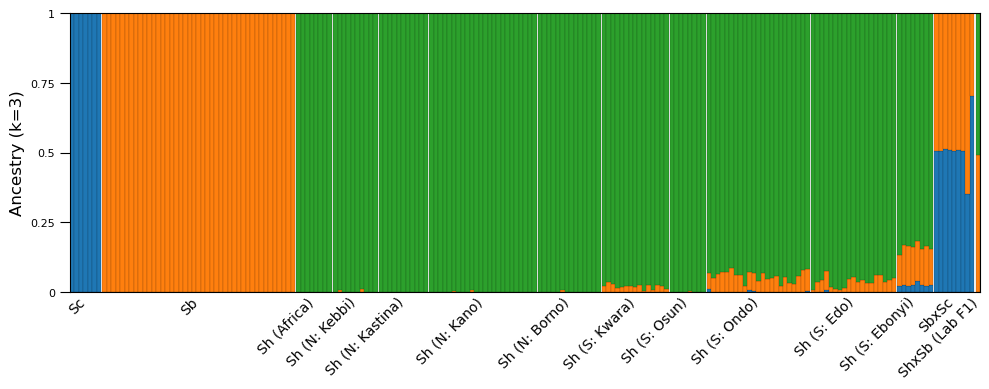

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#get to the working dir
proj_dir="/master/nplatt/sch_hae_its-nigeria"
results_dir="{}/results".format(proj_dir)
os.chdir(f"{results_dir}/supervised_admixture")

# load and pre-sort your data as before
adm_df = pd.read_csv("sup_adm_k3_df.mod.csv", sep=",", header=0)

custom_labels = {
    "shaematobium-north-kebbi": "Sh (N: Kebbi)",
    "shaematobium-north-kastina": "Sh (N: Kastina)",
    "shaematobium-north-kano": "Sh (N: Kano)",
    "shaematobium-north-borno": "Sh (N: Borno)",
    "shaematobium-south-kwara": "Sh (S: Kwara)",
    "shaematobium-south-osun": "Sh (S: Osun)",
    "shaematobium-south-ondo": "Sh (S: Ondo)",
    "shaematobium-south-edo": "Sh (S: Edo)",
    "shaematobium-south-ebonyi": "Sh (S: Ebonyi)",
    "scurassoni": "Sc",
    "shaematobium-africa": "Sh (Africa)",
    "sbovis": "Sb",
    "sbxsc": "SbxSc",
    "shxsb": "ShxSb (Lab F1)",
}

fig, ax = plt.subplots(figsize=(10, 4))
plot_admixture_panel(
    ax,
    adm_df,
    component_cols=("adm0","adm1","adm2"),
    adm_group_col="adm_group",
    adm_xorder_col="adm_xorder",
    gap_size=0.25,
    custom_labels=custom_labels,
    show_group_separators=False  # set True if you want thin boundary lines
)
plt.tight_layout()

#save the figure as multiple file types
fig.savefig(f"{results_dir}/figures/figure_X-supervised_admixture_k3.png", format="png", dpi=600, facecolor="white")
fig.savefig(f"{results_dir}/figures/figure_X-supervised_admixture_k3.tiff", format="tiff", dpi=600, facecolor="white")
fig.savefig(f"{results_dir}/figures/figure_X-supervised_admixture_k3.png", format="png")

# display
plt.show()
